In [1]:
import os, random, shutil
import numpy as np
import pandas as pd
import PIL
#import keras
import itertools
from PIL import Image
import warnings

import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#from skimage import feature, data, io, measure
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 
from tqdm import tqdm
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import BatchNormalization
#from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
import io
import time
import datetime
from tensorflow.keras.optimizers import Adam,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import urllib
import cv2

import logging
tf.get_logger().setLevel(logging.ERROR)

import glass_detection


Bad key "text.kerning_factor" on line 4 in
C:\Users\pranj\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


TypeError: bad argument type for built-in operation

In [8]:
from tensorflow.python.saved_model import tag_constants
from PIL import Image
import cv2
import numpy as np
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from absl import app, flags, logging
from absl.flags import FLAGS
import core.utils as utils
from core.yolov4 import filter_boxes

In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 64} ) 
sess = tf.compat.v1.Session(config=config) 
#keras.backend.set_session(sess)
tf.compat.v1.keras.backend.set_session(
    sess
)
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.333)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [5]:
#Load Model
from tensorflow.keras.models import load_model
Parent_model = load_model('trained models\\model_Parent_25_batch.h5')

In [18]:
test_img_fresh=cv2.imread("D:\\My ML Projects\\lenskart task\\test\\test6.jpg")
test_img=cv2.resize(test_img_fresh,(200,200))
test_img = test_img.astype('float32')
# normalize to the range 0-1
test_img /= 255.0

test_image_for_view=np.array(test_img)
test_image = np.expand_dims(test_image_for_view, axis=0)

A sunglasses found with Aviator shape


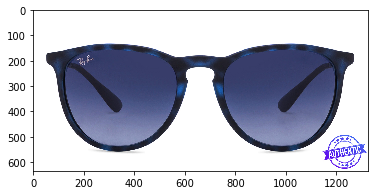

In [26]:
pred_parent=Parent_model.predict(test_image)
final_parent_pred=list(np.argmax(pred_parent, axis=1))[0]

ParentClass=np.where(final_parent_pred==0, "eyeframe",
         (np.where(final_parent_pred==1,"NonPowerReading",
         "sunglasses"))).item()

if(ParentClass=="eyeframe"):
    child_model = load_model('trained models\\model_eyeframes_25_batch.h5')
elif(ParentClass=="NonPowerReading"):
    child_model = load_model('trained models\\model_NonPowerReading_25_batch.h5')
elif(ParentClass=="sunglasses"):
    child_model = load_model('trained models\\model_Sunglasses_25_batch.h5')

pred_child=child_model.predict(test_image)
final_child_pred=list(np.argmax(pred_child, axis=1))[0]

ChildClass=np.where(final_child_pred==0, "Aviator",
                   (np.where(final_child_pred==1,"Oval",
                   (np.where(final_child_pred==2,"Rectangle",
         "Wayfarer"))))).item()

print(f"A {ParentClass} found with {ChildClass} shape")
plt.imshow(test_img_fresh)

In [2]:
import cv2

In [3]:
image="D:\\My ML Projects\\lenskart task\\test\\test7.jpg"
image = cv2.imread(image)
height, width=image.shape[:2]

In [4]:
start_row,start_col=int(height*0.442),int(width*0.498)
end_row,end_col= int(height*0.617),int(width*0.865)

In [5]:
cropped_image=image[start_row:end_row,start_col:end_col]

In [8]:
cv2.imwrite("cropped.jpg",cropped_image)

True

In [9]:
cv2.imshow("Cropped",cropped_image)
cv2.waitKey(0)

-1